22BAI1118 Mayank Raj

In [8]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


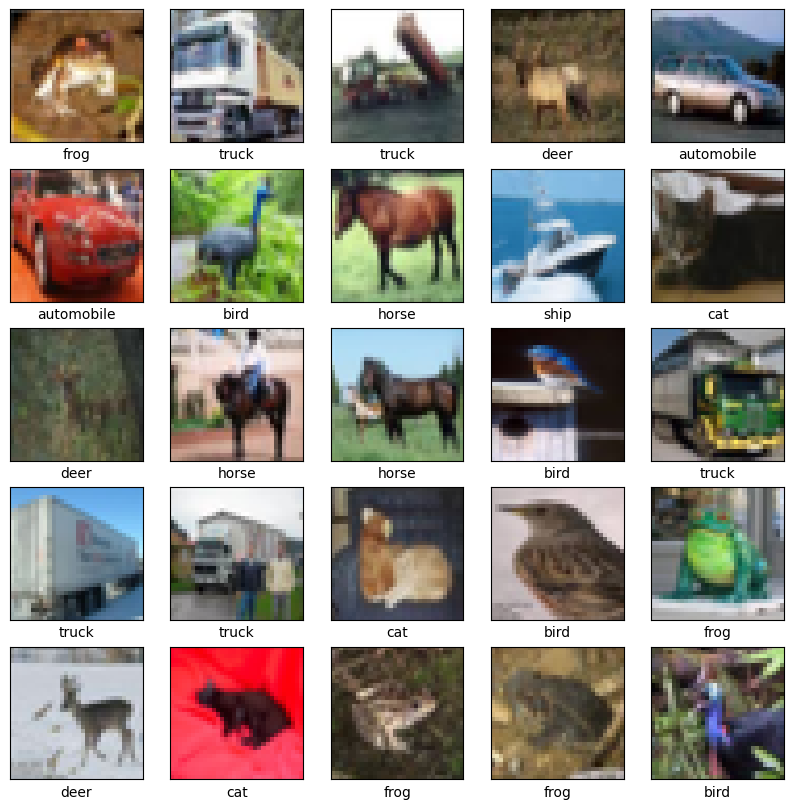

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Inference
In this cell, we import the necessary libraries, load the CIFAR-10 dataset, and normalize the pixel values. The normalization process scales the pixel values from 0 to 1, which helps improve the convergence speed of the model during training. We also define the class names corresponding to the labels in the dataset for better visualization and understanding later.

In [10]:
# Function to plot model accuracy
def plot_accuracy(history, model_name):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.title(f'{model_name} - Accuracy over Epochs')
    plt.legend(loc='lower right')
    plt.show()

# Function to create and train a model
def train_model(model, train_images, train_labels, test_images, test_labels, epochs=10):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=epochs,
                        validation_data=(test_images, test_labels))
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    return history, test_acc


## Inference
This cell defines utility functions used throughout the experiment. The plot_accuracy function generates plots for the training and validation accuracy over epochs, providing visual insight into how the model's performance evolves. The train_model function compiles the given model, trains it on the training dataset, evaluates it on the test dataset, and returns the training history and test accuracy.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3671 - loss: 1.7166 - val_accuracy: 0.5359 - val_loss: 1.2767
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5828 - loss: 1.1767 - val_accuracy: 0.6173 - val_loss: 1.0815
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6484 - loss: 1.0107 - val_accuracy: 0.6690 - val_loss: 0.9540
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6872 - loss: 0.8922 - val_accuracy: 0.6651 - val_loss: 0.9567
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7157 - loss: 0.8149 - val_accuracy: 0.6938 - val_loss: 0.8908
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7374 - loss: 0.7499 - val_accuracy: 0.7052 - val_loss: 0.8618
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7554 - loss: 0.7003 - val_accuracy: 0.7092 - val_loss: 0.8449
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7712 - loss: 0.6483 -

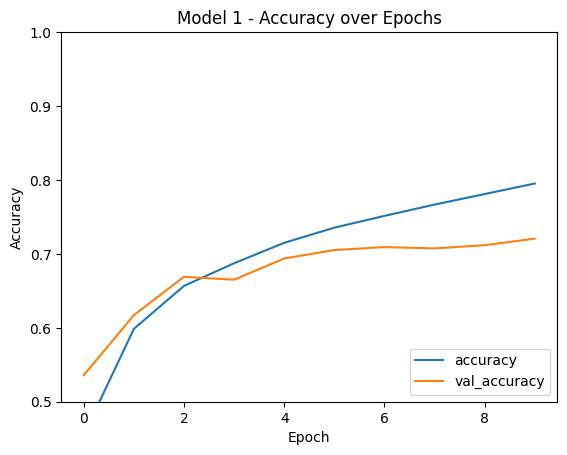

In [11]:
# Model 1: Baseline model
model_1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Train and evaluate Model 1
history_1, test_acc_1 = train_model(model_1, train_images, train_labels, test_images, test_labels)
print("Model 1 Test Accuracy:", test_acc_1)
plot_accuracy(history_1, "Model 1")


## Inference


Model 1: Baseline Model

-Convolution Layers: 3

-Filter Size: 3x3 for all layers

-Number of Filters: 32, 64, 64

-Padding: None

-Stride: Default (1)

-Pooling: MaxPooling2D

-Epochs: 10

-Activation Functions: ReLU

Justification: 

This baseline model uses a simple architecture with 3 convolutional layers and 2 max pooling layers to reduce dimensionality. The model captures basic spatial features and serves as a benchmark for more complex models.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3854 - loss: 1.6681 - val_accuracy: 0.5842 - val_loss: 1.1744
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6238 - loss: 1.0598 - val_accuracy: 0.6518 - val_loss: 0.9836
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7048 - loss: 0.8466 - val_accuracy: 0.6875 - val_loss: 0.8944
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7456 - loss: 0.7211 - val_accuracy: 0.7131 - val_loss: 0.8391
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7876 - loss: 0.6025 - val_accuracy: 0.7048 - val_loss: 0.8858
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8238 - loss: 0.5000 - val_accuracy: 0.7089 - val_loss: 0.9283
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8554 - loss: 0.4047 - val_accuracy: 0.7152 - val_loss: 0.9772
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8818 - loss: 

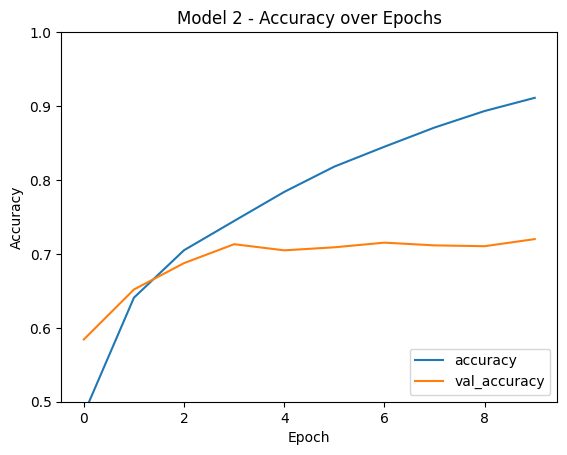

In [12]:
# Model 2: More convolutional layers and different filter sizes
model_2 = models.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

# Train and evaluate Model 2
history_2, test_acc_2 = train_model(model_2, train_images, train_labels, test_images, test_labels)
print("Model 2 Test Accuracy:", test_acc_2)
plot_accuracy(history_2, "Model 2")


## Inference
Model 2: Increased Filters and Padding

-Convolution Layers: 3

-Filter Size: First layer 5x5, others 3x3

-Number of Filters: 32, 64, 128

-Padding: 'same' for the first two layers

-Stride: Default (1)

-Pooling: MaxPooling2D

-Epochs: 10

-Activation Functions: ReLU

Justification: 

Increased filter size in the first layer captures more spatial features early on. Adding padding helps preserve the spatial dimensions, allowing for more depth in the network. More filters in the deeper layers help capture complex features.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3870 - loss: 1.6757 - val_accuracy: 0.5828 - val_loss: 1.1640
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6052 - loss: 1.1110 - val_accuracy: 0.6384 - val_loss: 1.0078
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6813 - loss: 0.9027 - val_accuracy: 0.6779 - val_loss: 0.9174
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7330 - loss: 0.7591 - val_accuracy: 0.6857 - val_loss: 0.8923
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7773 - loss: 0.6397 - val_accuracy: 0.7129 - val_loss: 0.8290
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8103 - loss: 0.5463 - val_accuracy: 0.7211 - val_loss: 0.8401
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8401 - loss: 0.4523 - val_accuracy: 0.7210 - val_loss: 0.8493
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8746 - 

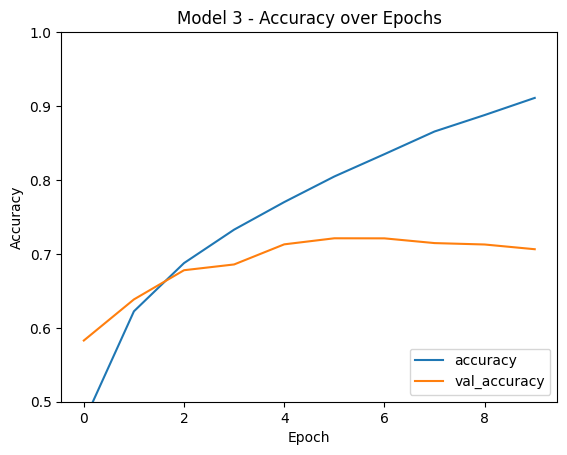

In [13]:
# Model 3: Using strides and average pooling
model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), strides=1, padding='same'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', strides=1, padding='same'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

# Train and evaluate Model 3
history_3, test_acc_3 = train_model(model_3, train_images, train_labels, test_images, test_labels)
print("Model 3 Test Accuracy:", test_acc_3)
plot_accuracy(history_3, "Model 3")


## Inference
Model 3: Using Strides and Average Pooling

-Convolution Layers: 3

-Filter Size: 3x3 for all layers

-Number of Filters: 32, 64, 128

-Padding: 'same' for all layers

-Stride: 1

-Pooling: AveragePooling2D

-Epochs: 10

-Activation Functions: ReLU

Justification: 

By using average pooling, the model aggregates features by averaging them, which can be more robust to noise compared to max pooling. Adjusting strides and adding padding ensures the output dimensions remain consistent, allowing deeper layers to process sufficient information.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3114 - loss: 1.8429 - val_accuracy: 0.5547 - val_loss: 1.2429
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5463 - loss: 1.2852 - val_accuracy: 0.6206 - val_loss: 1.0664
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6134 - loss: 1.1061 - val_accuracy: 0.6706 - val_loss: 0.9349
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6561 - loss: 0.9765 - val_accuracy: 0.6904 - val_loss: 0.8914
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6898 - loss: 0.8915 - val_accuracy: 0.6982 - val_loss: 0.8686
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7165 - loss: 0.8144 - val_accuracy: 0.7032 - val_loss: 0.8540
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7294 - loss: 0.7712 - val_accuracy: 0.7051 - val_loss: 0.8658
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7458 - loss: 0

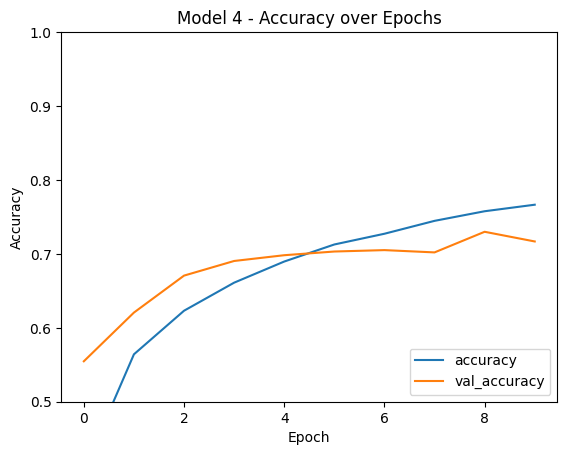

In [14]:
# Model 4: Adding dropout for regularization
model_4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Train and evaluate Model 4
history_4, test_acc_4 = train_model(model_4, train_images, train_labels, test_images, test_labels)
print("Model 4 Test Accuracy:", test_acc_4)
plot_accuracy(history_4, "Model 4")


## Inference
Model 4: Adding Dropout for Regularization

-Convolution Layers: 3

-Filter Size: 3x3 for all layers

-Number of Filters: 32, 64, 128

-Padding: None

-Stride: Default (1)

-Pooling: MaxPooling2D

-Epochs: 10

-Activation Functions: ReLU

-Dropout: 0.5

Justification: 

Adding dropout helps prevent overfitting by randomly dropping units during training, which forces the network to learn more robust features. This can improve generalization, especially when training data is limited.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4386 - loss: 1.5900 - val_accuracy: 0.5407 - val_loss: 1.3155
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6040 - loss: 1.1297 - val_accuracy: 0.6338 - val_loss: 1.0470
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6535 - loss: 1.0007 - val_accuracy: 0.6561 - val_loss: 1.0113
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6749 - loss: 0.9331 - val_accuracy: 0.6496 - val_loss: 1.0163
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6946 - loss: 0.8789 - val_accuracy: 0.6561 - val_loss: 1.0067
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7039 - loss: 0.8506 - val_accuracy: 0.6434 - val_loss: 1.0444
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7164 - loss: 0.8122 - val_accuracy: 0.6548 - val_loss: 1.0222
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7278 - loss: 0

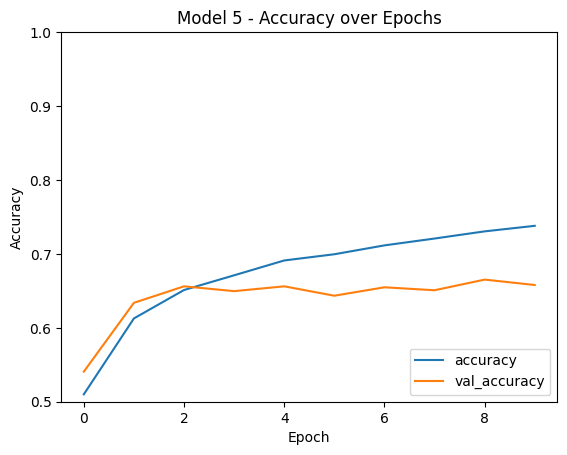

In [15]:
# Model 5: Using different activation functions
model_5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='tanh'),
    layers.Flatten(),
    layers.Dense(128, activation='tanh'),
    layers.Dense(10)
])

# Train and evaluate Model 5
history_5, test_acc_5 = train_model(model_5, train_images, train_labels, test_images, test_labels)
print("Model 5 Test Accuracy:", test_acc_5)
plot_accuracy(history_5, "Model 5")


## Inference
Model 5: Different Activation Functions

-Convolution Layers: 3

-Filter Size: 3x3 for all layers

-Number of Filters: 32, 64, 128

-Padding: None

-Stride: Default (1)

-Pooling: MaxPooling2D

-Epochs: 10

-Activation Functions: Tanh

Justification: 

Using tanh as the activation function instead of ReLU can help in scenarios where the network needs to learn features that are centered around zero. This can be beneficial when the input data is normalized to zero mean and unit variance.

# PART B

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


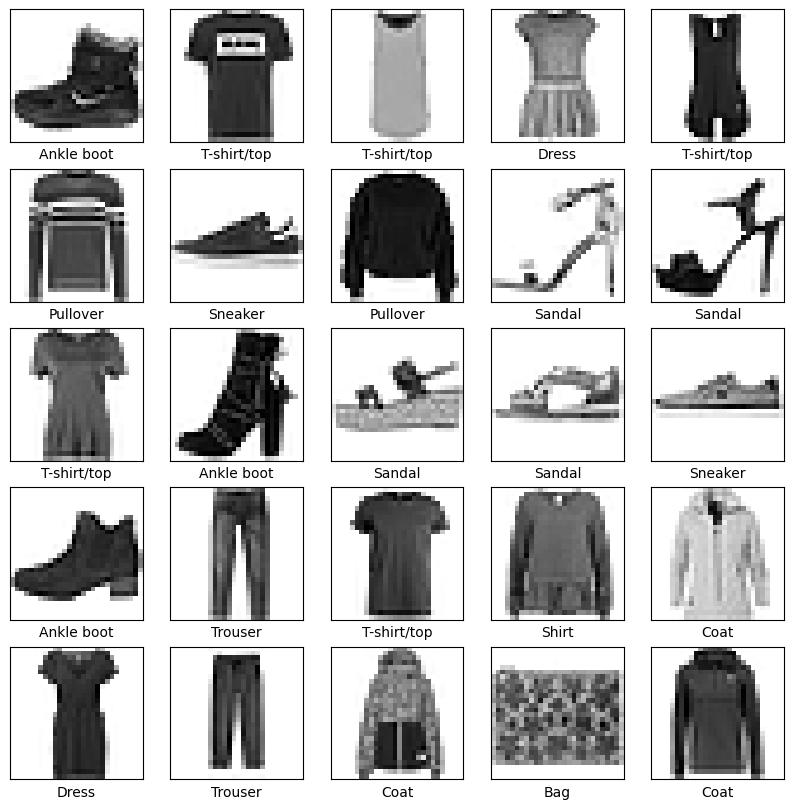

In [20]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
def load_fashion_mnist():
    (train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
    
    # Normalize images to the range [0, 1]
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    
    # Add channel dimension
    train_images = np.expand_dims(train_images, -1)
    test_images = np.expand_dims(test_images, -1)
    
    return train_images, train_labels, test_images, test_labels

# Load and preprocess the Fashion MNIST dataset
train_images, train_labels, test_images, test_labels = load_fashion_mnist()

# Class names for Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to plot images
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

plot_images(train_images, train_labels, class_names)


In [21]:
# Function to create and train a model
def train_model(model, train_images, train_labels, test_images, test_labels, epochs=10):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=epochs,
                        validation_data=(test_images, test_labels))
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    return history, test_acc

# Function to plot model accuracy
def plot_accuracy(history, model_name):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.title(f'{model_name} - Accuracy over Epochs')
    plt.legend(loc='lower right')
    plt.show()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7469 - loss: 0.6907 - val_accuracy: 0.8523 - val_loss: 0.3855
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8760 - loss: 0.3369 - val_accuracy: 0.8868 - val_loss: 0.3159
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8988 - loss: 0.2803 - val_accuracy: 0.8980 - val_loss: 0.2827
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9103 - loss: 0.2431 - val_accuracy: 0.9022 - val_loss: 0.2677
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9206 - loss: 0.2174 - val_accuracy: 0.8989 - val_loss: 0.2873
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9268 - loss: 0.1991 - val_accuracy: 0.9021 - val_loss: 0.2743
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9346 - loss: 0.1781 - val_accuracy: 0.9090 - val_loss: 0.2595
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9395 - loss: 0.1654 -

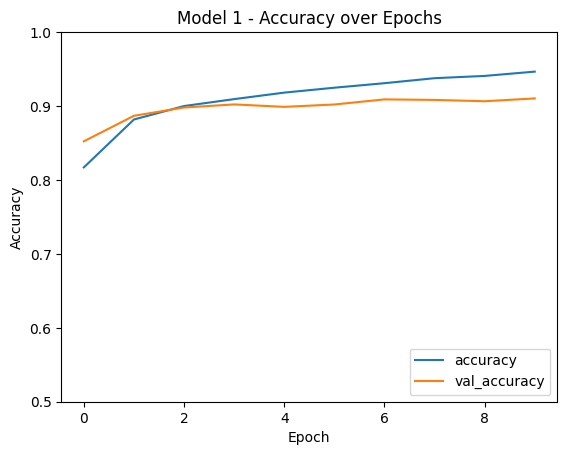

In [22]:
# Model 1: Baseline model
model_1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


# Train and evaluate Model 1
history_1, test_acc_1 = train_model(model_1, train_images, train_labels, test_images, test_labels)
print("Model 1 Test Accuracy:", test_acc_1)


plot_accuracy(history_1, "Model 1")


## Inference
Model 1 Justification:

-Convolution Layers: 3

-Filter Size: 3x3

-Number of Filters: 32, 64, 64

-Padding: Default

-Stride: Default (1)

-Pooling: MaxPooling2D

-Epochs: 10

-Activation Functions: ReLU

Justification:

This baseline model is designed to capture basic features of the Fashion MNIST dataset with a standard convolutional architecture. The filter size and number of filters are moderate, which should provide a good starting point for more complex models.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7626 - loss: 0.6576 - val_accuracy: 0.8726 - val_loss: 0.3582
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8810 - loss: 0.3221 - val_accuracy: 0.8954 - val_loss: 0.2858
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9034 - loss: 0.2626 - val_accuracy: 0.8958 - val_loss: 0.2824
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9158 - loss: 0.2280 - val_accuracy: 0.9031 - val_loss: 0.2700
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9255 - loss: 0.2036 - val_accuracy: 0.9113 - val_loss: 0.2495
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9337 - loss: 0.1783 - val_accuracy: 0.9082 - val_loss: 0.2549
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9396 - loss: 0.1602 - val_accuracy: 0.9140 - val_loss: 0.2461
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9466 - loss: 0

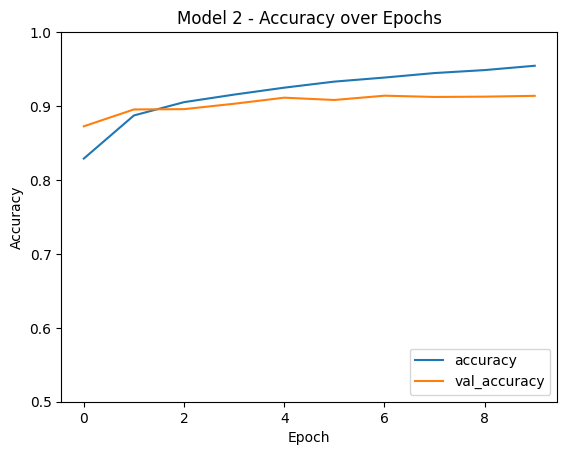

In [23]:
# Model 2: Increased Filters and Padding
model_2 = models.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

# Train and evaluate Model 2
history_2, test_acc_2 = train_model(model_2, train_images, train_labels, test_images, test_labels)
print("Model 2 Test Accuracy:", test_acc_2)

plot_accuracy(history_2, "Model 2")


## Inference
Model 2 Justification:

-Convolution Layers: 3

-Filter Size: First layer 5x5, others 3x3

-Number of Filters: 32, 64, 128

-Padding: 'same' for the first two layers

-Stride: Default (1)

-Pooling: MaxPooling2D

-Epochs: 10

-Activation Functions: ReLU

Justification:

 Increased filter size in the first layer captures more spatial features early on. Adding padding helps preserve spatial dimensions, allowing for more depth in the network. More filters in deeper layers help capture complex features.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7376 - loss: 0.7098 - val_accuracy: 0.8563 - val_loss: 0.3906
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8697 - loss: 0.3549 - val_accuracy: 0.8828 - val_loss: 0.3270
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8906 - loss: 0.2962 - val_accuracy: 0.8948 - val_loss: 0.2941
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9063 - loss: 0.2548 - val_accuracy: 0.8910 - val_loss: 0.3049
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9143 - loss: 0.2326 - val_accuracy: 0.9037 - val_loss: 0.2662
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9227 - loss: 0.2075 - val_accuracy: 0.9078 - val_loss: 0.2638
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9267 - loss: 0.1931 - val_accuracy: 0.9069 - val_loss: 0.2704
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9312 - loss: 0.181

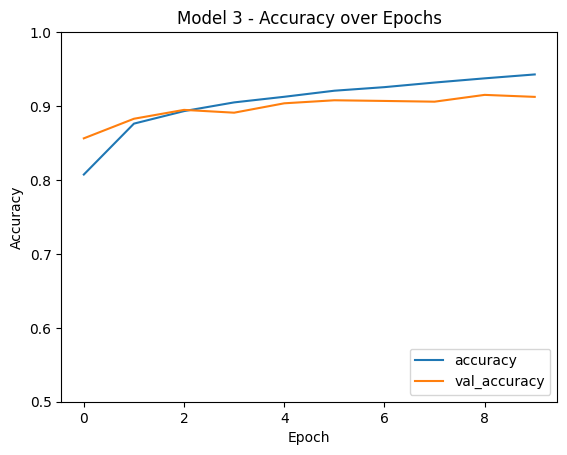

In [25]:
# Model 3: Using strides and average pooling with adjusted parameters
model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), strides=1),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', strides=1),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

# Train and evaluate Model 3
history_3, test_acc_3 = train_model(model_3, train_images, train_labels, test_images, test_labels)
print("Model 3 Test Accuracy:", test_acc_3)
plot_accuracy(history_3, "Model 3")


## Inference
Model 3 Justification:

-Convolution Layers: 3

-Filter Size: 3x3 for all convolutional layers

-Number of Filters: 32, 64, 128

-Padding: No explicit padding specified (default is 'valid')

-Stride: 1 for convolutional layers

-Pooling: AveragePooling2D with pool size of (2, 2)

-Epochs: 10

-Activation Functions: ReLU

-Justification:

Uses strides of 1 to maintain spatial dimensions and prevent excessive reduction in feature map size. Average pooling is employed to down-sample while preserving important features, making the model efficient in capturing relevant patterns without overly shrinking the spatial dimensions.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7188 - loss: 0.7724 - val_accuracy: 0.8631 - val_loss: 0.3766
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8672 - loss: 0.3686 - val_accuracy: 0.8784 - val_loss: 0.3230
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8922 - loss: 0.3001 - val_accuracy: 0.8889 - val_loss: 0.3141
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9009 - loss: 0.2728 - val_accuracy: 0.8967 - val_loss: 0.2835
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9100 - loss: 0.2442 - val_accuracy: 0.9059 - val_loss: 0.2628
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9152 - loss: 0.2289 - val_accuracy: 0.9068 - val_loss: 0.2647
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9214 - loss: 0.2150 - val_accuracy: 0.9091 - val_loss: 0.2575
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9308 - loss: 0.1

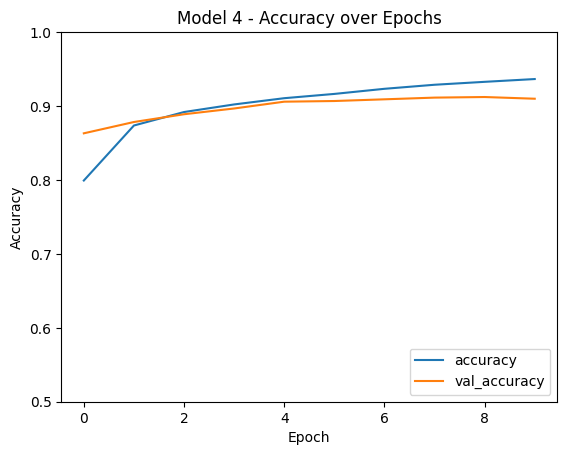

In [26]:
# Model 4: Adding dropout for regularization
model_4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Train and evaluate Model 4
history_4, test_acc_4 = train_model(model_4, train_images, train_labels, test_images, test_labels)
print("Model 4 Test Accuracy:", test_acc_4)

plot_accuracy(history_4, "Model 4")


## Inference
Model 4 Justification:

-Convolution Layers: 3

-Filter Size: 3x3

-Number of Filters: 32, 64, 128

-Padding: Default

-Stride: Default (1)

-Pooling: MaxPooling2D

-Epochs: 10

-Activation Functions: ReLU

-Dropout: 0.5

Justification:

Adding dropout helps to prevent overfitting by randomly dropping units during training, which improves generalization.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7906 - loss: 0.5755 - val_accuracy: 0.8711 - val_loss: 0.3559
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8853 - loss: 0.3162 - val_accuracy: 0.8861 - val_loss: 0.3115
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8983 - loss: 0.2769 - val_accuracy: 0.8874 - val_loss: 0.3129
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9063 - loss: 0.2541 - val_accuracy: 0.8912 - val_loss: 0.3003
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9157 - loss: 0.2285 - val_accuracy: 0.8914 - val_loss: 0.2956
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9183 - loss: 0.2188 - val_accuracy: 0.8977 - val_loss: 0.2902
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9242 - loss: 0.2073 - val_accuracy: 0.8961 - val_loss: 0.2950
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9289 - loss: 0.1930 -

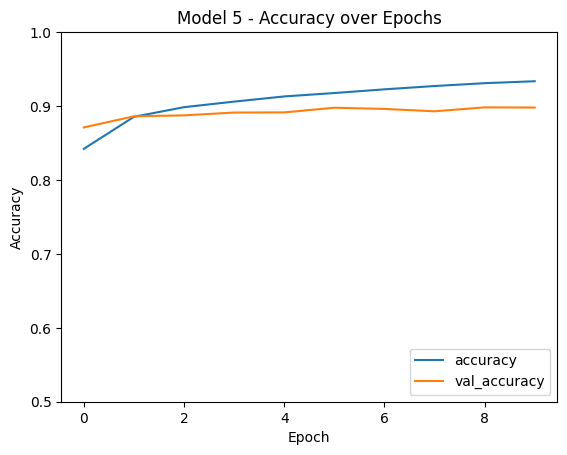

In [27]:
# Model 5: Using different activation functions
model_5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='tanh'),
    layers.Flatten(),
    layers.Dense(128, activation='tanh'),
    layers.Dense(10)
])

# Train and evaluate Model 5
history_5, test_acc_5 = train_model(model_5, train_images, train_labels, test_images, test_labels)
print("Model 5 Test Accuracy:", test_acc_5)

plot_accuracy(history_5, "Model 5")


## Inference
Model 5 Justification:

-Convolution Layers: 3

-Filter Size: 3x3

-Number of Filters: 32, 64, 128

-Padding: Default

-Stride: Default (1)

-Pooling: MaxPooling2D

-Epochs: 10

-Activation Functions: Tanh

Justification:

Using the tanh activation function provides a different non-linearity compared to ReLU, which might capture different features or improve performance in some cases.